<a href="https://colab.research.google.com/github/MicroPyscho/MicroPyscho/blob/main/House_features_and_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import computation features and load train dataset

In [ ]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import functools as ft
from google.colab import data_table
from scipy.spatial import distance
from scipy.stats import pearsonr
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
from math import sqrt
import statsmodels.api as sm
from scipy.stats import spearmanr, kendalltau
%matplotlib inline

Step 2: Load test and train dataset

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/msc_training_dataset.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/msc_testing_dataset.csv")
train_data

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,1,2,1,1,0,0,1,0,0,0,4825
2996,1,1,2,3,0,1,1,0,0,1,1,6755
2997,2,2,1,2,0,0,1,1,1,0,0,7565
2998,4,1,1,2,1,1,1,0,0,0,1,9135


Step 3: Observe the descriptive features of dataset

In [ ]:
scipy.stats.skew(train_data.select_dtypes(np.number))

array([ 0.01829686,  0.04401065, -0.08808531,  0.0030486 ,  0.0386739 ,
        0.04534498,  0.06002702,  0.01733398, -0.04934835,  0.07739121,
        0.00133333,  0.00448252])

In [ ]:
test_data

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178
...,...,...,...,...,...,...,...,...,...,...,...,...
994,5,2,2,3,1,1,0,0,0,0,0,10088
995,5,1,2,3,1,1,0,0,0,0,0,9788
996,3,2,2,1,0,1,1,1,0,1,0,9388
997,3,2,1,1,1,0,0,1,1,0,0,8528


In [ ]:
print(len(train_data))
print(len(test_data))

3000
999


In [ ]:
test_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
room,999.0,3.019019,1.413731,1.0,2.0,3.0,4.0,5.0
bathroom,999.0,1.491491,0.500178,1.0,1.0,1.0,2.0,2.0
kitchen,999.0,1.496496,0.500238,1.0,1.0,1.0,2.0,2.0
french_door,999.0,1.959960,0.809759,1.0,1.0,2.0,3.0,3.0
backyard,999.0,0.510511,0.500140,0.0,0.0,1.0,1.0,1.0
furnished,999.0,0.474474,0.499598,0.0,0.0,0.0,1.0,1.0
green_paint,999.0,0.523524,0.499696,0.0,0.0,1.0,1.0,1.0
solar_power,999.0,0.490490,0.500160,0.0,0.0,0.0,1.0,1.0
woodfloor,999.0,0.501502,0.500248,0.0,0.0,1.0,1.0,1.0
qlm_security,999.0,0.500501,0.500250,0.0,0.0,1.0,1.0,1.0


In [ ]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
room,3000.0,2.990000,1.424281,1.0,2.0,3.0,4.0,5.0
bathroom,3000.0,1.489000,0.499962,1.0,1.0,1.0,2.0,2.0
kitchen,3000.0,1.522000,0.499599,1.0,1.0,2.0,2.0,2.0
french_door,3000.0,1.998333,0.813153,1.0,1.0,2.0,3.0,3.0
backyard,3000.0,0.490333,0.499990,0.0,0.0,0.0,1.0,1.0
furnished,3000.0,0.488667,0.499955,0.0,0.0,0.0,1.0,1.0
green_paint,3000.0,0.485000,0.499858,0.0,0.0,0.0,1.0,1.0
solar_power,3000.0,0.495667,0.500065,0.0,0.0,0.0,1.0,1.0
woodfloor,3000.0,0.512333,0.499931,0.0,0.0,1.0,1.0,1.0
qlm_security,3000.0,0.480667,0.499709,0.0,0.0,0.0,1.0,1.0


In [ ]:
train_data.mean()

room               2.990000
bathroom           1.489000
kitchen            1.522000
french_door        1.998333
backyard           0.490333
furnished          0.488667
green_paint        0.485000
solar_power        0.495667
woodfloor          0.512333
qlm_security       0.480667
club_access        0.499667
price           8606.600000
dtype: float64

Step 4: Check for missing values 


In [ ]:
train_data.info()
train_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB


room            0
bathroom        0
kitchen         0
french_door     0
backyard        0
furnished       0
green_paint     0
solar_power     0
woodfloor       0
qlm_security    0
club_access     0
price           0
dtype: int64

In [ ]:
train_data.head(5)


,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [ ]:
train_data.tail(5)


,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
2995,1,1,2,1,1,0,0,1,0,0,0,4825
2996,1,1,2,3,0,1,1,0,0,1,1,6755
2997,2,2,1,2,0,0,1,1,1,0,0,7565
2998,4,1,1,2,1,1,1,0,0,0,1,9135
2999,4,2,1,1,0,0,0,1,1,0,0,8955


Step 5:Observe skewness of train data


<Axes: >

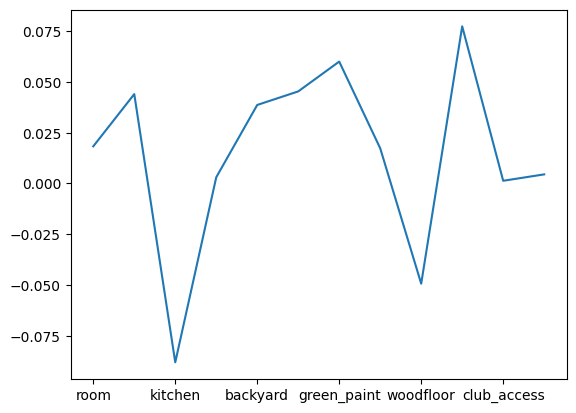

In [ ]:
skewness = train_data.skew()
skewness.plot.line()

In [ ]:
train_data.skew()

room            0.018306
bathroom        0.044033
kitchen        -0.088129
french_door     0.003050
backyard        0.038693
furnished       0.045368
green_paint     0.060057
solar_power     0.017343
woodfloor      -0.049373
qlm_security    0.077430
club_access     0.001334
price           0.004485
dtype: float64

Step 6: Create visual representation of train data

array([[<Axes: title={'center': 'room'}>,
        <Axes: title={'center': 'bathroom'}>,
        <Axes: title={'center': 'kitchen'}>],
       [<Axes: title={'center': 'french_door'}>,
        <Axes: title={'center': 'backyard'}>,
        <Axes: title={'center': 'furnished'}>],
       [<Axes: title={'center': 'green_paint'}>,
        <Axes: title={'center': 'solar_power'}>,
        <Axes: title={'center': 'woodfloor'}>],
       [<Axes: title={'center': 'qlm_security'}>,
        <Axes: title={'center': 'club_access'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

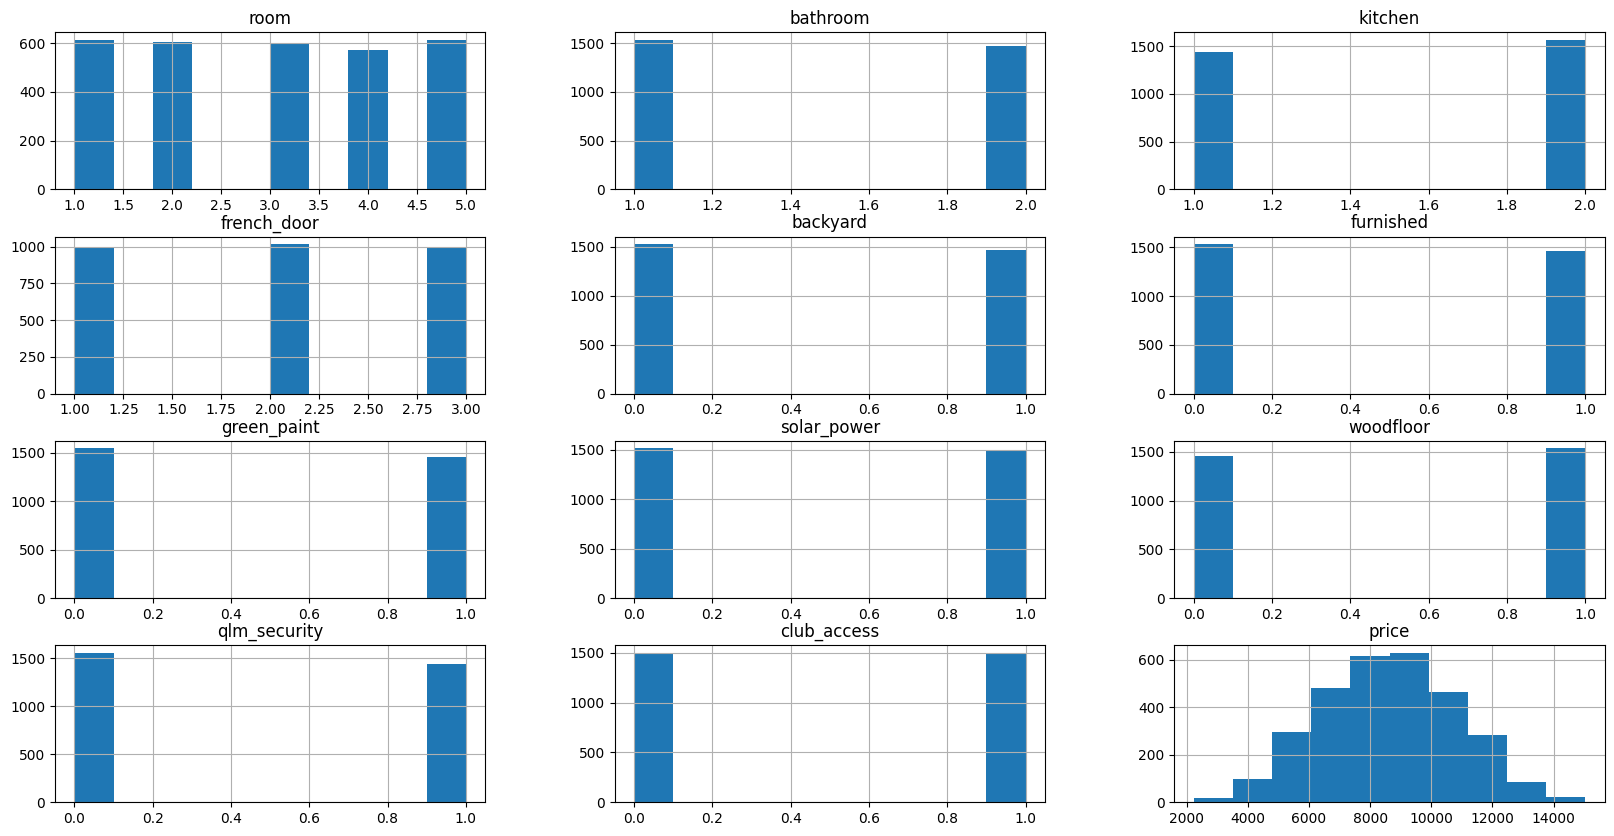

In [ ]:
train_data.hist(figsize = (20, 10))

<Axes: ylabel='Frequency'>

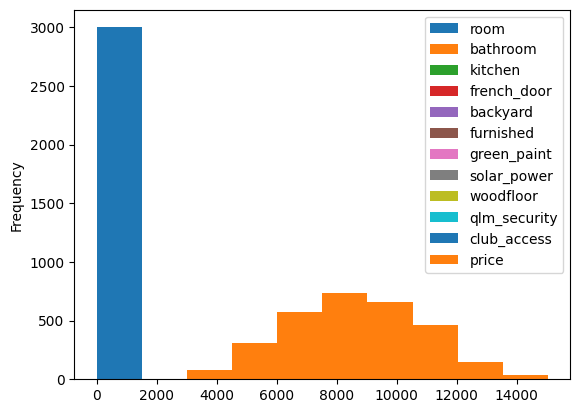

In [ ]:
figsize = (15, 8)
train_data.plot.hist()

<Axes: ylabel='Density'>

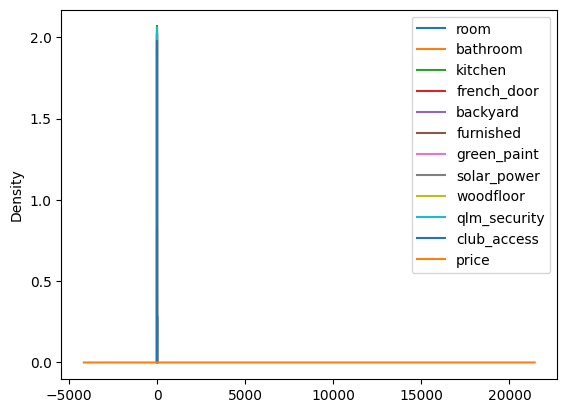

In [ ]:
train_data.plot.kde()

<Axes: >

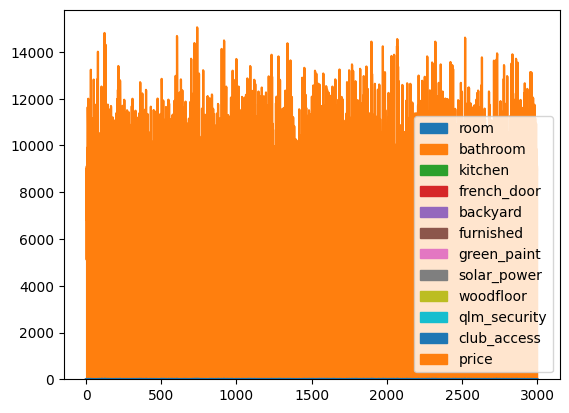

In [ ]:
train_data.plot.area()

Step 7: Observe house feature correlation to price in test data

In [ ]:
neg_data_corr = train_data.corr()['price'].sort_values()[:-1].head(8)
neg_data_corr

bathroom        0.062724
green_paint     0.077428
qlm_security    0.079210
french_door     0.087913
kitchen         0.122804
backyard        0.125625
club_access     0.166944
solar_power     0.317680
Name: price, dtype: float64

In [ ]:
pos_data_corr = train_data.corr()['price'].sort_values()[:-1].tail(8)
pos_data_corr

french_door    0.087913
kitchen        0.122804
backyard       0.125625
club_access    0.166944
solar_power    0.317680
woodfloor      0.434485
furnished      0.452742
room           0.649354
Name: price, dtype: float64

In [ ]:
from numpy.core.fromnumeric import size
import plotly.express as px
data_corr = train_data.corr()['price'].sort_values()[:-1]
fig = px.bar(data_corr,orientation="h", color_discrete_sequence=["blue"])
plt.figure(figsize = (10, 5))
fig

<Figure size 1000x500 with 0 Axes>

In [ ]:
train_x = train_data.drop('price', axis=1)
test_x = test_data.drop('price', axis=1)
train_y = train_data['price']
test_y = test_data['price']

Step 8: Split datasets into feature and target


In [ ]:
train_x.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access
0,3,1,2,1,1,0,1,0,0,1,1
1,5,2,2,2,1,0,0,0,0,1,1
2,5,2,2,2,1,0,0,0,0,1,1
3,1,2,1,2,0,0,0,0,1,1,0
4,2,1,2,3,1,1,0,0,1,1,0


In [ ]:
train_y.head(5)

0    6835
1    9005
2    9005
3    5105
4    9105
Name: price, dtype: int64

Step 9: Check for indication of multicollinearity in train data



---



In [ ]:
correlation_matrix = train_x.corr()
correlation_matrix

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access
room,1.000000,0.015766,0.021865,0.010350,0.001269,0.004055,-0.015667,-0.006147,0.013754,-0.024165,0.001400
bathroom,0.015766,1.000000,-0.014383,0.011027,0.011580,-0.010504,0.035364,-0.022864,0.001877,-0.024208,-0.028021
kitchen,0.021865,-0.014383,1.000000,-0.021661,-0.001151,0.002334,-0.023380,0.003718,-0.009764,0.023074,0.003366
french_door,0.010350,0.011027,-0.021661,1.000000,0.009392,-0.010299,0.010193,-0.014368,0.017686,-0.025928,-0.015171
backyard,0.001269,0.011580,-0.001151,0.009392,1.000000,-0.002439,0.002088,-0.005502,0.011149,-0.012092,-0.022684
furnished,0.004055,-0.010504,0.002334,-0.010299,-0.002439,1.000000,0.032009,-0.019536,0.007897,-0.014224,0.016656
green_paint,-0.015667,0.035364,-0.023380,0.010193,0.002088,0.032009,1.000000,-0.008264,-0.011268,-0.005834,-0.018695
solar_power,-0.006147,-0.022864,0.003718,-0.014368,-0.005502,-0.019536,-0.008264,1.000000,-0.019793,-0.003671,-0.013340
woodfloor,0.013754,0.001877,-0.009764,0.017686,0.011149,0.007897,-0.011268,-0.019793,1.000000,0.004292,0.006685
qlm_security,-0.024165,-0.024208,0.023074,-0.025928,-0.012092,-0.014224,-0.005834,-0.003671,0.004292,1.000000,0.028662


<Axes: >

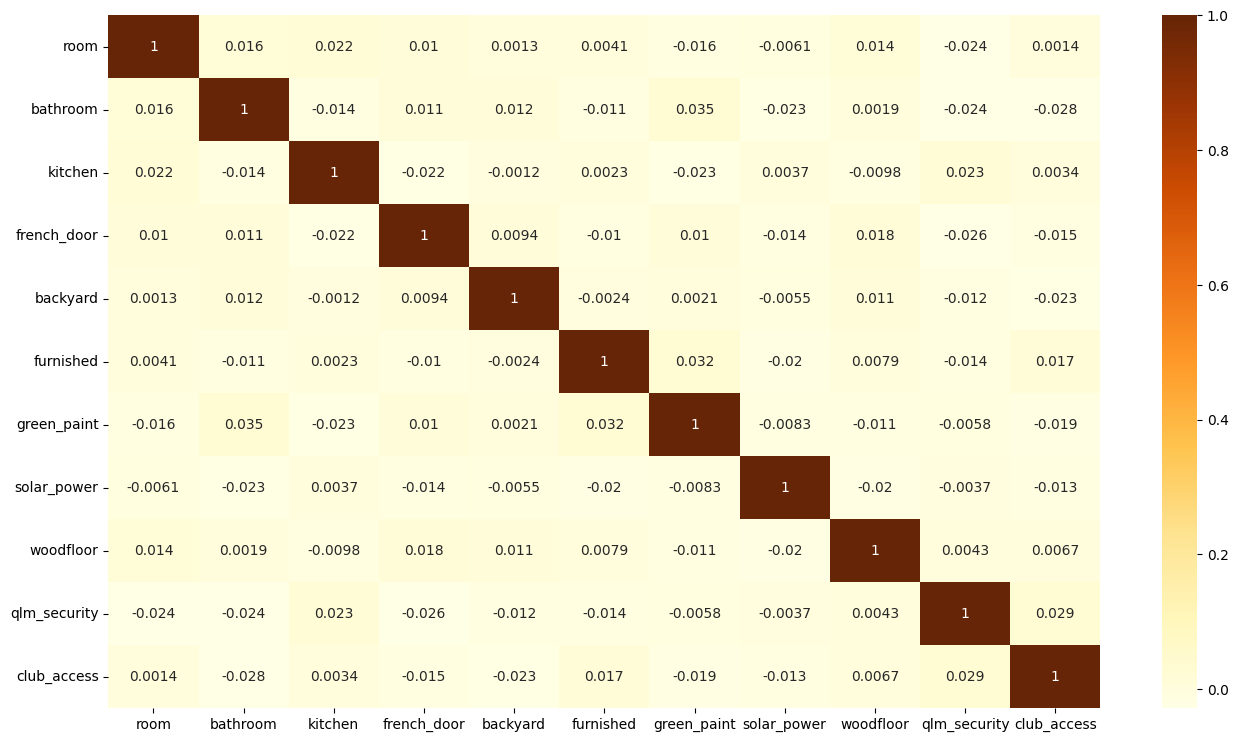

In [ ]:
plt.figure(figsize = (16, 9))
sns.heatmap(train_x.corr(), annot=True, cmap = "YlOrBr")

Brown = perfect correlation (1), light yellow = low or no correlation (0)

Set a 0.4 threshold of multicollinearity to see which variables fall into the category 

In [ ]:
def correlation(train_x, threshold):
  multi_corr = set()
  correlation_mtx = train_x.corr()
  for s in range (len(correlation_mtx.columns)):
    for t in range (s):
      if abs(correlation_mtx.iloc[s, t]) > threshold:
        outcome = correlation_mtx.columns[s]
        multi_corr.add(outcome)
        return multi_corr


In [ ]:
correlation(train_x, 0.4)

Step 10: Run the Linear regression model

In [ ]:
reg = LinearRegression()
reg.fit(train_x, train_y)

LinearRegression()

In [ ]:
predicted_price = reg.predict(test_x)

In [ ]:
reg.score(train_x, train_y)

1.0

In [ ]:
predicted_price

array([ 5055.,  7645., 11305.,  8845., 11165., 11375., 11735.,  6835.,
        7815.,  5895.,  9095.,  8295.,  6695., 11305.,  7205.,  9165.,
        8775., 12745.,  9745.,  6655.,  9325.,  7785.,  7075.,  4315.,
        9965.,  6855.,  7335.,  8895.,  6325.,  9695.,  6645., 10305.,
       10485.,  8195.,  7565., 10355.,  9475., 11115.,  9765., 12825.,
        6295.,  5125.,  9825.,  8895., 11715.,  6205.,  4095., 11475.,
        9565.,  5535., 11455., 10395.,  4125.,  7735., 13055.,  9595.,
        6445.,  8365., 10155.,  7835.,  8275., 14305.,  7075.,  8435.,
       12625.,  7095., 11435., 10555., 10095.,  5535.,  8235., 12095.,
        4215.,  5865.,  9355.,  9245.,  7065., 11625., 10855., 10825.,
        8785.,  7355., 11865.,  8315., 11805.,  5945.,  8775.,  8275.,
        7165.,  8245.,  7575., 11925., 11965.,  7975.,  6645., 10795.,
       11235.,  8195.,  9355.,  7445.,  7235.,  8935.,  4575.,  9675.,
        5735.,  5075., 10645.,  9705.,  8605., 12515.,  8165.,  6105.,
      

In [ ]:
data_table.enable_dataframe_formatter()
compared_prices

NameError: ignored

In [ ]:

plt.plot(test_y, color="red", label="truth")
plt.plot(predicted_price, color="blue", label="predicted")
plt.title("Comparing truth and predicted house prices for Linear Regression")
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Top Important Features
importances = reg.coef_
for i,v in enumerate(importances):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()

In [ ]:
knn = KNeighborsRegressor()
knn.fit(train_x, train_y)

In [ ]:
knn.score(train_x, train_y)

In [ ]:
predicted_priceKNN = knn.predict(test_x)
print(predicted_priceKNN)

In [ ]:
data_table.enable_dataframe_formatter()
compared_pricesKNN

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test_y, color="red", label="truth")
plt.plot(predicted_priceKNN, color="blue", label="predicted")
plt.legend()
plt.grid()
plt.title("Comparing truth and predicted price values for KNN")
plt.tight_layout()
plt.show()

In [ ]:
#Top Important Features
importances = reg.coef_
for i,v in enumerate(importances):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()


In [ ]:
lin_mae = mean_absolute_error(test_y, predicted_price)
knn_mae = mean_absolute_error(test_y, predicted_priceKNN)
errors = [lin_mae, knn_mae]
labels = ["LinearReg", "KNNReg",]
bars = plt.bar(labels, errors, width=0.4)
for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x(), yval + .005, yval)
#plt.grid()
plt.title("MAE Comparison for Linear Regression vs KNN")

In [ ]:
lin_mse = mean_squared_error(test_y, predicted_price)
knn_mse = mean_squared_error(test_y, predicted_priceKNN)
errors = [lin_mse, knn_mse]
labels = ["LinearReg", "KNNReg",]
bars = plt.bar(labels, errors, width=0.4)
for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x(), yval + .005, yval)
#plt.grid()
plt.title("MSE Comparison for Linear Regression vs KNN")

Comparing prices in the test data with prices predicted by Linear Regression model


In [ ]:
truth_predictedLR = pd.merge(predicted_price,test_y,how = 'left',left_index = True, right_index = True)
truth_predictedLR

Comparing prices in the test data with prices predicted by K-Nearest Neighbour model

In [ ]:

predicted_priceKNN = pd.DataFrame(predicted_priceKNN, columns = ["price"])
truth_predictedKNN = pd.merge(predicted_priceKNN,test_y,how = 'left',left_index = True, right_index = True)
truth_predictedKNN


Comparing KNN, Linear Regression and test data prices


In [ ]:
pd.merge(predicted_priceKNN,truth_predictedLR,how = 'left',left_index = True, right_index = True)